In [1]:
# !pip install torch torchvision

In [2]:
import torch
import torch.nn as nn
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import numpy as np

In [3]:
train_data = torchvision.datasets.MNIST('mnist', 
                                        train=True, 
                                        download=True,
                                        transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
test_data = torchvision.datasets.MNIST('mnist',
                                       train=False,
                                       download=True,
                                       transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=5000, shuffle=False)

In [41]:
in_nodes = 28 * 28
out_nodes = 10
hidden_nodes = [500, 300]
epoch_number = 5

class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.net = nn.Sequential(nn.Linear(in_nodes, hidden1_nodes),
                                nn.BatchNorm1d(hidden1_nodes),
                                nn.ReLU(), 
                                nn.Linear(hidden1_nodes, hidden2_nodes),
                                nn.BatchNorm1d(hidden2_nodes),
                                nn.ReLU(), 
                                nn.Linear(hidden2_nodes, out_nodes),
                                nn.BatchNorm1d(out_nodes))
    
    def forward(self, x):
        return self.net(x)

In [5]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs):
    score = []
    
    for epoch in range(epochs):
        for x, y in train_loader: 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        correct = 0
        
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        
        accuracy = 100 * (correct / len(test_data))
        score.append(accuracy)
        print("Epoch: {} Accuracy: {}".format(epoch,accuracy))
    
    plt.plot(score)
    plt.title('Best accuracy: {}'.format(max(score)))
    plt.show()

In [43]:
model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Epoch: 0 Accuracy: 93.87
Epoch: 1 Accuracy: 96.73
Epoch: 2 Accuracy: 97.2
Epoch: 3 Accuracy: 97.61999999999999
Epoch: 4 Accuracy: 97.81


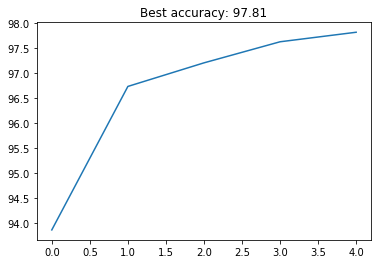

In [44]:
train(model, criterion, train_loader, validation_loader, optimizer, epoch_number)

In [55]:
url = 'https://s3.private.eu-de.cloud-object-storage.appdomain.cloud/neural-network-test-image-recognition/3.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
img

In [56]:
user_tensor = torch.from_numpy(np.array(img)).float()

In [57]:
yhat = model(user_tensor.view(-1, 28 * 28))
_, label = torch.max(yhat, 1)
print(label.tolist()[0])

3
